## Dataset examples

- Le corpus de données du projet JRC-Acquis 
Ce corpus est une collection de textes multilingues couvrant les domaines de la législation, des politiques et de l'administration de l'Union européenne. Le corpus comprend plus de 20 langues européennes, y compris le français, et est annoté par catégorie, telle que la législation, les politiques agricoles, l'environnement, etc. Vous pouvez utiliser cet ensemble de données pour entraîner des modèles de classification de textes multilingues qui peuvent classer des phrases en fonction de leur catégorie.

https://joint-research-centre.ec.europa.eu/language-technology-resources/jrc-acquis_en#download-the-jrc-acquis-corpus

https://wt-public.emm4u.eu/Acquis/JRC-Acquis.3.0/corpus/

- European Parliament Proceedings Parallel Corpus 1996-2011
Ce corpus est une collection de textes multilingues qui couvrent les débats du Parlement européen entre 1996 et 2011. Il comprend des traductions en français, anglais, espagnol, italien, allemand, portugais, suédois, tchèque, polonais, grec et finnois. Les textes sont alignés par phrase et peuvent être utilisés pour des tâches de traduction automatique et d'analyse de texte.

https://www.statmt.org/europarl/

- Corpus Est Républicain 

Le corpus Est Républicain est un corpus journalistique composé d'articles parus dans le quotidien l'Est Républicain entre 1999 et 2003. La version initiale du corpus est mise à disposition sur Ortolang au format texte, encodé en TEI P5 (titres, paragraphes, etc.).

http://redac.univ-tlse2.fr/corpus/estRepublicain.html

- Corpus TALN articles scientifiques issus des actes des conférences TALN et RECITAL de 1997 à 2019

Le corpus TALN rassemble les articles des conférences TALN et RÉCITAL des années 1997 à 2019.
Il se compose de 1602 articles scientifiques en français qui traitent du domaine du traitement automatique des langues (TAL) pour un total de 5,8 millions de mots.

http://redac.univ-tlse2.fr/corpus/taln.html

- sklearn dataset : fetch_20newsgroups

https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

## Europarl dataset

In [1]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import missingno as msno
from sklearn.manifold import TSNE
import plotly.express as px

In [2]:
# dataset-from https://www.statmt.org/europarl/ and following work from nowbrains
df = pd.read_fwf("data/europarl-v7.fr-en.fr", header=None, sep='\n')
df.head(10)

0    1    2    3    4    5    
0                              Reprise de la session  NaN  NaN  NaN  NaN  NaN  \
1  Je déclare reprise la session du Parlement eur...  NaN  NaN  NaN  NaN  NaN   
2  Comme vous avez pu le constater, le grand "bog...  NaN  NaN  NaN  NaN  NaN   
3  Vous avez souhaité un débat à ce sujet dans le...  NaN  NaN  NaN  NaN  NaN   
4  En attendant, je souhaiterais, comme un certai...  NaN  NaN  NaN  NaN  NaN   
5  Je vous invite à vous lever pour cette minute ...  NaN  NaN  NaN  NaN  NaN   
6  (Le Parlement, debout, observe une minute de s...  NaN  NaN  NaN  NaN  NaN   
7  Madame la Présidente, c'est une motion de proc...  NaN  NaN  NaN  NaN  NaN   
8  Vous avez probablement appris par la presse et...  NaN  NaN  NaN  NaN  NaN   
9  L'une des personnes qui vient d'être assassiné...  NaN  NaN  NaN  NaN  NaN   

    6    7    8    9    10  
0  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  
7  NaN  NaN  NaN  NaN  NaN  
8  NaN  NaN  NaN  NaN  NaN  
9  NaN  NaN  NaN  NaN  NaN

<Axes: >

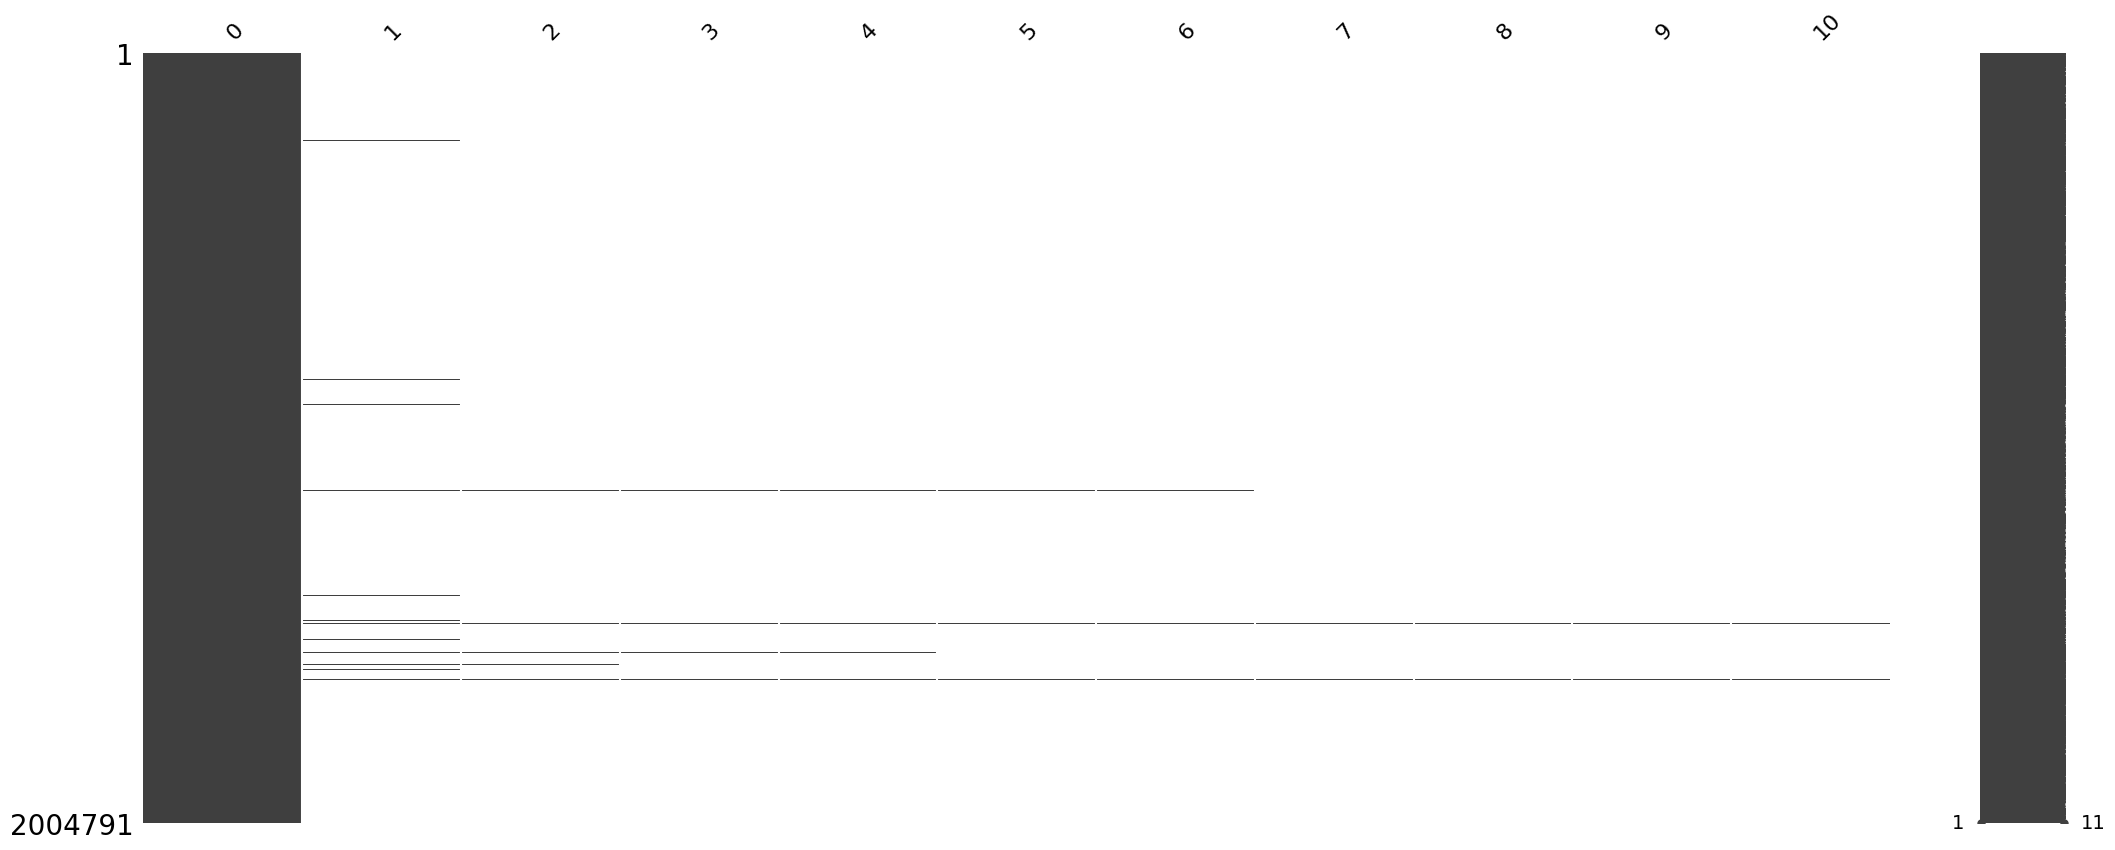

In [3]:
msno.matrix(df)

In [4]:
df[~df[1].isna()].shape

(25958, 11)

In [5]:
# on enlève les quelques phrases qui ne rentrent pas dans la première cellule.
df1 = df[0]
df1.head(5)
df2 = df1.iloc[:30000]
df2
df_final = df2.copy()

In [6]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(df2, convert_to_tensor=True)
embeddings_u = model.encode(df2, show_progress_bar=True)

Batches:   0%|          | 0/938 [00:00<?, ?it/s]

In [7]:
embeddings.shape

torch.Size([30000, 384])

### T-SNE dimension reduction

In [8]:
nemb = embeddings.cpu().numpy()
view_2 = TSNE(n_components=2, random_state=123, n_jobs=-1).fit_transform(nemb)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [9]:
df2=df2.to_frame()
df2.rename(columns={0: 'discours'}, inplace=True)
df2.head()
df = df2.copy()
df["x"] = view_2[:,0]
df["y"] = view_2[:,1]
df.to_csv("df_TSNE.csv", sep="|")

In [10]:
df

discours          x          y
0                                  Reprise de la session -36.211815 -78.956963
1      Je déclare reprise la session du Parlement eur...   1.782145 -88.289162
2      Comme vous avez pu le constater, le grand "bog... -59.332058  -0.278800
3      Vous avez souhaité un débat à ce sujet dans le... -14.472909 -42.717445
4      En attendant, je souhaiterais, comme un certai...  21.947351  39.184303
...                                                  ...        ...        ...
29995  Comme le dit un proverbe espagnol - qui convie... -41.867172 -46.390144
29996  Aussi, mon groupe va soutenir le rapport du ra...  17.952749 -51.908440
29997  Néanmoins, je voudrais souligner que l' on a r...  14.660518  54.294418
29998  Par ailleurs, la demande de vesces pour l' ali... -73.980301   0.011226
29999  D' autre part, les problèmes alimentaires qu' ... -73.807152  -2.399051

[30000 rows x 3 columns]

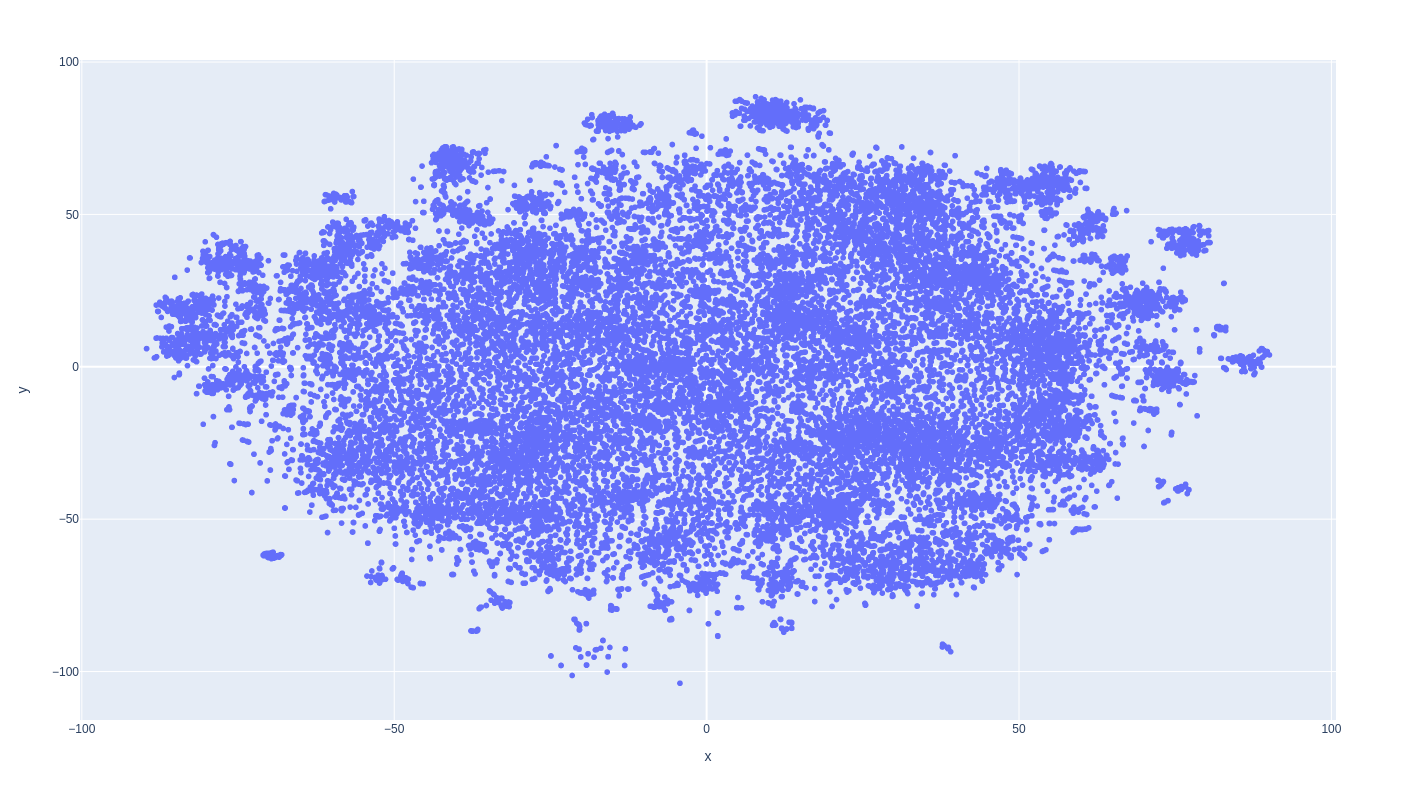

In [11]:
df_TSNE = pd.read_csv("df_TSNE.csv", sep="|")
fig = px.scatter(
    df_TSNE, 
    x="x", y="y",
    width=1100, height=800
    )
fig.show()

### UMAP dimension reduction

Now following : https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6

In [12]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings_u)

/home/pfcynapps/miniconda3/envs/nlp/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/home/pfcynapps/miniconda3/envs/nlp/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/home/pfcynapps/miniconda3/envs/nlp/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDep

### Clustering via hdbscan

In [13]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=30,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

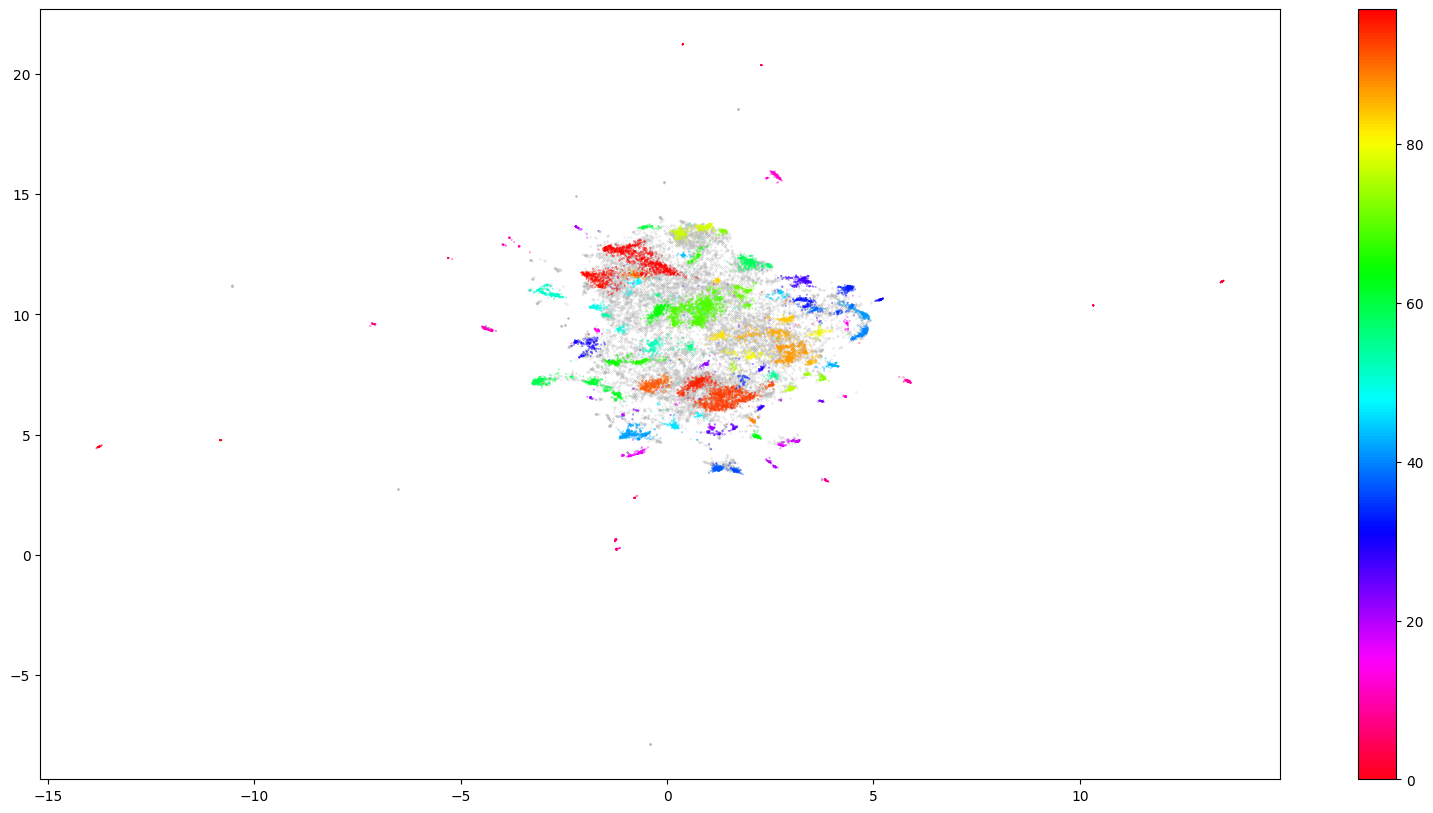

In [14]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings_u)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

### Deriving topics from clustered documents

In [15]:
#1. creating a single document for each cluster of documents
docs_df = pd.DataFrame(df2, columns=["discours"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'discours': ' '.join})

In [16]:
#2. Quantifying a single importance value for each word in a cluster which can be used to create the topic

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('french')

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords).fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.discours.values, m=len(df2))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pfcynapps/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#3. Topic Representation: The higher the score, the more representative it should be of its topic
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .discours
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "discours": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

Topic   Size
0      -1  15383
70     69   1225
94     93    986
98     97    935
88     87    484
43     42    448
97     96    414
60     59    366
92     91    320
96     95    318

In [18]:
#3. Topic Reduction
# from sklearn.metrics.pairwise import cosine_similarity
# for i in range(20):
#     # Calculate cosine similarity
#     similarities = cosine_similarity(tf_idf.T)
#     np.fill_diagonal(similarities, 0)

#     # Extract label to merge into and from where
#     topic_sizes = docs_df.groupby(['Topic']).count().sort_values("discours", ascending=False).reset_index()
#     topic_to_merge = topic_sizes.iloc[-1].Topic
#     topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

#     # Adjust topics
#     docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
#     old_topics = docs_df.sort_values("Topic").Topic.unique()
#     map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
#     docs_df.Topic = docs_df.Topic.map(map_topics)
#     docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'discours': ' '.join})

#     # Calculate new topic words
#     m = len(df2)
#     tf_idf, count = c_tf_idf(docs_per_topic.discours.values, m)
#     top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

# topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

(3.0, 14.0)

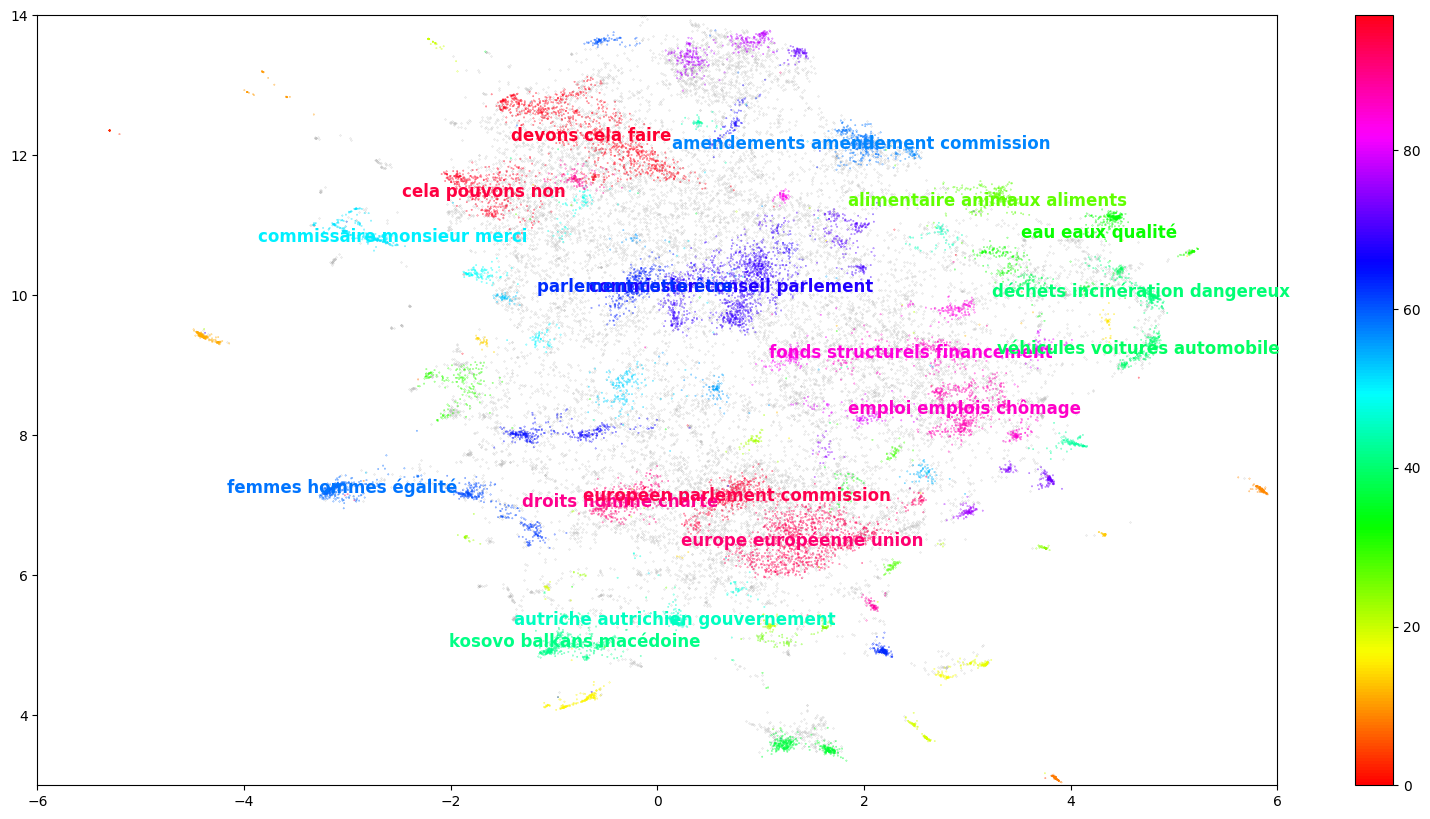

In [63]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
a=plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv')
plt.colorbar()

cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]

x_mean = clustered.groupby(['labels'])['x'].mean()
y_mean = clustered.groupby(['labels'])['y'].mean()

for i in range(1,20):
    topic = topic_sizes.Topic.iloc[i]
    label = top_n_words[topic][0][0]+' '+top_n_words[topic][1][0]+' '+top_n_words[topic][2][0]
    plt.annotate(label, 
                 (x_mean[topic],y_mean[topic]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 c=cmaplist[round(topic/len(topic_sizes)*cmap.N)]) 
plt.xlim(-6, 6)  
plt.ylim(3, 14)  